In [1]:
import keras
import pathlib
import tensorflow as tf
import os, shutil

Using TensorFlow backend.


In [0]:
URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname="cats_and_dogs_filtered.zip", 
                                   extract=True)
base_dir, _ = os.path.splitext(zip_file)

In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print ('Total training cat images:', len(os.listdir(train_cats_dir)))

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print ('Total training dog images:', len(os.listdir(train_dogs_dir)))

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print ('Total validation cat images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print ('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


## Building the Network 

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data Preprocessing

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the Model

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 117s 1s/step - loss: 0.6933 - acc: 0.5290 - val_loss: 0.6846 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 115s 1s/step - loss: 0.6837 - acc: 0.5390 - val_loss: 0.6569 - val_acc: 0.6320
Epoch 3/10
100/100 [==============================] - 116s 1s/step - loss: 0.6762 - acc: 0.5615 - val_loss: 0.6719 - val_acc: 0.5650
Epoch 4/10
100/100 [==============================] - 116s 1s/step - loss: 0.6618 - acc: 0.5880 - val_loss: 0.6659 - val_acc: 0.5870
Epoch 5/10
100/100 [==============================] - 115s 1s/step - loss: 0.6585 - acc: 0.6070 - val_loss: 0.6247 - val_acc: 0.6350
Epoch 6/10
100/100 [==============================] - 115s 1s/step - loss: 0.6376 - acc: 0.6205 - val_loss: 0.7277 - val_acc: 0.5600
Epoch 7/10
100/100 [==============================] - 117s 1s/step - loss: 0.6331 - acc: 0.6195 - val_loss: 0.5867 - val_acc: 0.6930
Epoch 8/10
100/100 [==============================] - 121s 1s/step - 

## Visualisation

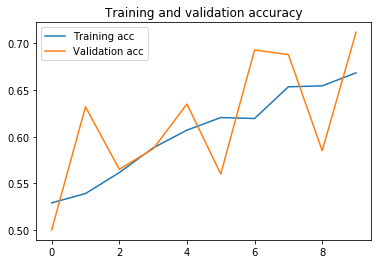

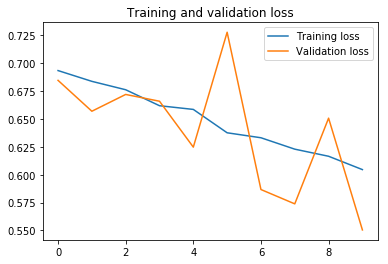

In [8]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and test datasets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test datasets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']


# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()